# Evolving Clustering for Data Stream

Applying SOStream to the database: [Clustering basic benchmark](http://cs.joensuu.fi/sipu/datasets/)

![alt text](https://ia801409.us.archive.org/29/items/CapturaDeTelaDe20190407191831/Captura%20de%20tela%20de%202019-04-07%2019-18-31.png)

## 1. Database S1

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1.1 SOStream

In [246]:
from sostream import SOStream

In [247]:
data_s1 = pd.read_csv('../data/s1.txt', delimiter='    ', header=None, engine='python')
data_s1.describe()

,0,1
count,5000.000000,5000.000000
mean,514937.556600,494709.292800
std,244465.901926,235840.852969
min,19835.000000,51121.000000
25%,320352.500000,320107.750000
50%,505338.500000,526259.500000
75%,786228.750000,713713.500000
max,961951.000000,970756.000000


In [266]:
data_s1cb = pd.read_csv('../data/s-originals/s1-cb.txt', delimiter=' ', header=None, engine='python')
data_s1cb = data_s1cb.loc[:,:1]

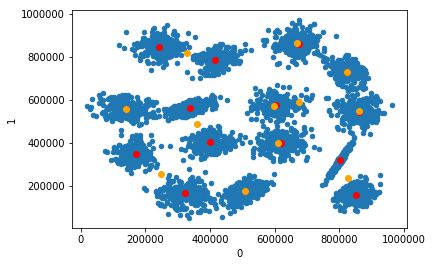

In [304]:
data_s1.plot.scatter(x=0,y=1)

sostream_clusteringS1 = SOStream(alpha = 0, min_pts = 3, merge_threshold = 59900)

for r in data_s1.values:
    sostream_clusteringS1.process(r)

s1 = np.array([c.centroid for c in sostream_clusteringS1.M[-1]])
plt.scatter(data_s1cb.loc[:,0],data_s1cb.loc[:,1],color='red')
plt.scatter(s1[:,0], s1[:,1], color='orange')

plt.show()

In [307]:
print('Clusters encontrados: ',s1.shape[0])
print('Clusters verdadeiros: ',data_s1cb.shape[0])

Clusters encontrados:  12
Clusters verdadeiros:  15


### 1.2 DBSCAN

In [257]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [258]:
X = data_df.values
clustering = DBSCAN(eps=20000, min_samples=5).fit(X)
np.unique(clustering.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16])

In [259]:
clustering

DBSCAN(algorithm='auto', eps=20000, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

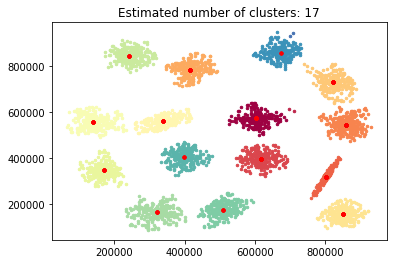

In [373]:
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
#     if k == -1:
#         # Black used for noise.
#         col = [0, 0, 0, 1]
        
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    
    plt.plot(xy[:, 0], xy[:, 1], '.',
         markerfacecolor=tuple(col),
         markeredgecolor=tuple(col),
         markersize=5
        )
    plt.plot(data_cb.loc[:,0],data_cb.loc[:,1],'.',color='red')
# ruido
#     xy = X[class_member_mask & ~core_samples_mask]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
#              markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## 2. Database S2

### 2.1 SOStream

In [235]:
data_s2 = pd.read_csv('../data/s2.txt', delimiter='    ', header=None, engine='python')
data_s2.describe()

,0,1
count,5000.000000,5000.000000
mean,525659.356400,477365.536400
std,220767.929728,233838.906612
min,55608.000000,25631.000000
25%,365718.250000,245461.500000
50%,539262.000000,471640.500000
75%,725951.250000,696209.000000
max,983609.000000,984555.000000


In [264]:
data_s2cb = pd.read_csv('../data/s-originals/s2-cb.txt', delimiter=' ', header=None, engine='python')
data_s2cb = data_s2cb.loc[:,:1]

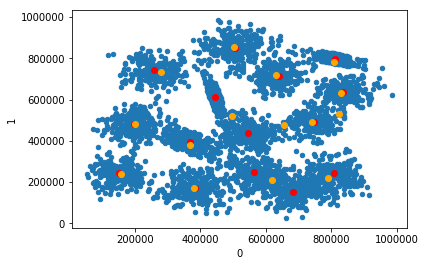

In [318]:
data_s2.plot.scatter(x=0,y=1)

sostream_clusteringS2 = SOStream(alpha = 0, min_pts = 3, merge_threshold = 67000)

for r in data_s2.values:
    sostream_clusteringS2.process(r)

s2 = np.array([c.centroid for c in sostream_clusteringS2.M[-1]])
plt.scatter(data_s2cb.loc[:,0],data_s2cb.loc[:,1],color='red')
plt.scatter(s2[:,0], s2[:,1], color='orange')

plt.show()

In [319]:
print('Clusters encontrados: ',s2.shape[0])
print('Clusters verdadeiros: ',data_s2cb.shape[0])

Clusters encontrados:  15
Clusters verdadeiros:  15


### 2.2 DBSCAN

In [401]:
X_S2 = data_s2.values
clustering_s2 = DBSCAN(eps=50000, min_samples=100).fit(X_S2)
print(len(np.unique(clustering_s2.labels_)))

clustering_s2

14


DBSCAN(algorithm='auto', eps=50000, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=100, n_jobs=1, p=None)

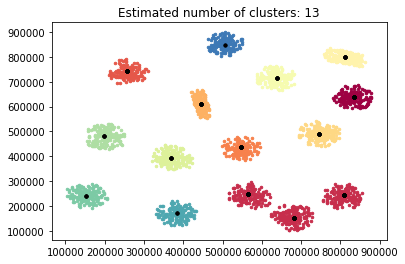

In [420]:
core_samples_mask = np.zeros_like(clustering_s2.labels_, dtype=bool)
core_samples_mask[clustering_s2.core_sample_indices_] = True
labels = clustering_s2.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
#     if k == -1:
#         # Black used for noise.
#         col = [0, 0, 0, 1]
        
    class_member_mask = (labels == k)
    xy = X_S2[class_member_mask & core_samples_mask]
    
    plt.plot(xy[:, 0], xy[:, 1], '.',
         markerfacecolor=tuple(col),
         markeredgecolor=tuple(col),
         markersize=5
        )
    plt.plot(data_s2cb.loc[:,0],data_s2cb.loc[:,1],'.',color='black')
# ruido
#     xy = X[class_member_mask & ~core_samples_mask]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
#              markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## 3. Database S3

### 3.1 SOStream

In [320]:
data_s3 = pd.read_csv('../data/s3.txt', delimiter='    ', header=None, engine='python')
data_s3.describe()

,0,1
count,5000.000000,5000.000000
mean,496564.695000,485799.739600
std,196628.464271,198939.143541
min,32710.000000,70003.000000
25%,329967.500000,317271.000000
50%,502124.500000,460873.500000
75%,654700.000000,649026.250000
max,942327.000000,947322.000000


In [354]:
data_s3cb = pd.read_csv('../data/s-originals/s3-cb.txt', delimiter='	', header=None, engine='python')
data_s3cb = data_s3cb.loc[:,:1]

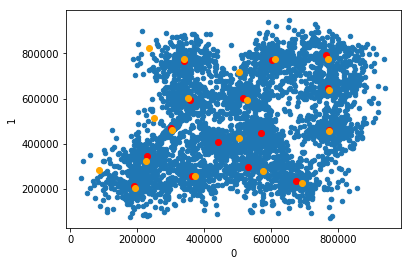

In [371]:
data_s3.plot.scatter(x=0,y=1)

sostream_clusteringS3 = SOStream(alpha = 0, min_pts = 3, merge_threshold = 100000)

for r in data_s3.values:
    sostream_clusteringS3.process(r)

s3 = np.array([c.centroid for c in sostream_clusteringS3.M[-1]])
plt.scatter(data_s3cb.loc[:,0],data_s3cb.loc[:,1],color='red')
plt.scatter(s3[:,0], s3[:,1], color='orange')

plt.show()

In [372]:
print('Clusters encontrados: ',s3.shape[0])
print('Clusters verdadeiros: ',data_s3cb.shape[0])

Clusters encontrados:  18
Clusters verdadeiros:  15


### 2.2 DBSCAN

In [416]:
X_S3 = data_s3.values
clustering_s3 = DBSCAN(eps=40999, min_samples=100).fit(X_S3)
print(len(np.unique(clustering_s3.labels_)))

clustering_s3

15


DBSCAN(algorithm='auto', eps=40999, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=100, n_jobs=1, p=None)

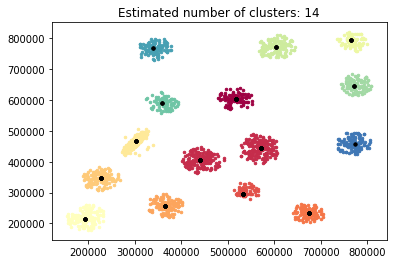

In [419]:
core_samples_mask = np.zeros_like(clustering_s3.labels_, dtype=bool)
core_samples_mask[clustering_s3.core_sample_indices_] = True
labels = clustering_s3.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
#     if k == -1:
#         # Black used for noise.
#         col = [0, 0, 0, 1]
        
    class_member_mask = (labels == k)
    xy = X_S3[class_member_mask & core_samples_mask]
    
    plt.plot(xy[:, 0], xy[:, 1], '.',
         markerfacecolor=tuple(col),
         markeredgecolor=tuple(col),
         markersize=5
        )
    plt.plot(data_s3cb.loc[:,0],data_s3cb.loc[:,1],'.',color='black')
# ruido
#     xy = X[class_member_mask & ~core_samples_mask]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
#              markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()